<a href="https://colab.research.google.com/github/shaheerzubery/Deeplearning/blob/main/Cifar_10_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 5.8 MB 54.4 MB/s 
     |████████████████████████████████| 438 kB 69.3 MB/s 
     |████████████████████████████████| 1.6 MB 63.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [3]:
import tensorflow
from tensorflow import keras

print("tensorflow version", tensorflow.__version__ )
print("keras version", keras.__version__)

tensorflow version 2.8.0
keras version 2.8.0


['bird', 'truck', 'ship', 'deer', 'automobile', 'dog', 'horse', 'airplane', 'frog', 'cat']


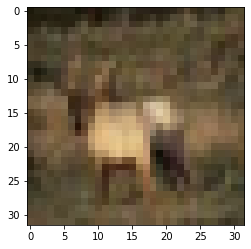

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpmg
import numpy as np


data = "/content/drive/MyDrive/cifar10/train"
Classes = os.listdir(data)
print(Classes)


#I just Showed only one image because few folders are empty while i was running the loop the list got out of range becasue of the empty folder

img = mpmg.imread("/content/drive/MyDrive/cifar10/train/deer/0001.png")
plt.imshow(img)
   


## **PreProcessing and spliting of data (For training and validation)**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128,128)
bat_size = 30


Datagen = ImageDataGenerator(rescale = 1/255,
                             validation_split = .30)

print("train data Preparation")
train_generation = Datagen.flow_from_directory(
    data,
    target_size = img_size,
    batch_size = bat_size,
    class_mode = 'categorical',
    subset = 'training'

)

print("Validation data Preparation")
Val_generation = Datagen.flow_from_directory(
    data,
    target_size = img_size,
    batch_size = bat_size,
    class_mode = 'categorical',
    subset = 'validation'

)

class_name = list(train_generation.class_indices.keys())
print('data generation ready')


train data Preparation
Found 20321 images belonging to 10 classes.
Validation data Preparation
Found 8709 images belonging to 10 classes.
data generation ready


# **CNC MODEL**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

model = Sequential()

model.add(Conv2D(32,(6,6), input_shape = train_generation.image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32,(6,6), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32,(6,6), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(train_generation.num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


print(model.summary())




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)      

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath = 'best_base_model.keras',
    save_best_only = True,
    monitor = 'val_accuracy')
]

In [8]:
num_epochs = 5
history= model.fit(
    train_generation,
    steps_per_epoch = train_generation.samples // bat_size,
    validation_data = Val_generation,
    validation_steps = Val_generation.samples // bat_size,
    epochs = num_epochs,
    callbacks = callbacks

)

Epoch 1/5
677/677 [==============================] - 5384s 8s/step - loss: 1.2781 - accuracy: 0.4964 - val_loss: 1.0494 - val_accuracy: 0.5966
Epoch 2/5
677/677 [==============================] - 50s 74ms/step - loss: 0.9546 - accuracy: 0.6447 - val_loss: 0.8724 - val_accuracy: 0.6766
Epoch 3/5
677/677 [==============================] - 50s 74ms/step - loss: 0.8196 - accuracy: 0.6992 - val_loss: 0.7376 - val_accuracy: 0.7315
Epoch 4/5
677/677 [==============================] - 50s 74ms/step - loss: 0.7204 - accuracy: 0.7377 - val_loss: 0.7128 - val_accuracy: 0.7433
Epoch 5/5
677/677 [==============================] - 49s 73ms/step - loss: 0.6532 - accuracy: 0.7639 - val_loss: 0.6586 - val_accuracy: 0.7654


Visualization Of data

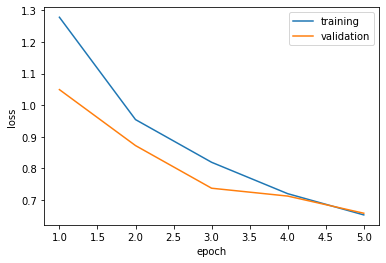

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()